# Question 01

part a

In [ ]:
!pip install torch

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


Epoch 1/20, Loss: 0.9902902001142502
Epoch 2/20, Loss: 0.9740742549896241
Epoch 3/20, Loss: 0.9619874778985977
Epoch 4/20, Loss: 0.9528065314292907
Epoch 5/20, Loss: 0.9457130733132363
Epoch 6/20, Loss: 0.9401481088995933
Epoch 7/20, Loss: 0.9357217059731483
Epoch 8/20, Loss: 0.9321570528745651
Epoch 9/20, Loss: 0.9292542770504951
Epoch 10/20, Loss: 0.9268666660785675
Epoch 11/20, Loss: 0.9248850045800209
Epoch 12/20, Loss: 0.9232269006371498
Epoch 13/20, Loss: 0.9218293405771255
Epoch 14/20, Loss: 0.9206436414718628
Epoch 15/20, Loss: 0.919631734251976
Epoch 16/20, Loss: 0.9187635189890861
Epoch 17/20, Loss: 0.9180150157213212
Epoch 18/20, Loss: 0.9173669614791871
Epoch 19/20, Loss: 0.916803678393364
Epoch 20/20, Loss: 0.9163123533129692


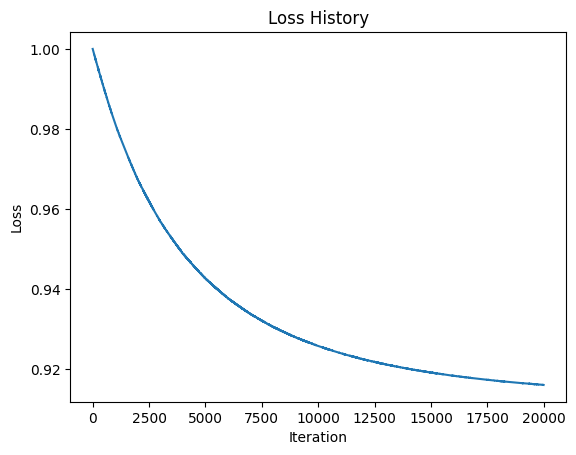

Training accuracy: 10.00%
Test accuracy: 10.00%


In [37]:
Din = 3 * 32 * 32
K = 10
H = 100
std = 1e-5

w1 = torch.randn(Din, H) * std
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std
b2 = torch.zeros(K)

iterations = 20
lr = 2e-6
lr_decay = 0.9
reg = 0
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_pred = hidden.mm(w2) + b2

        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw2 = hidden.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    lr *= lr_decay

plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


part b and c

Epoch 1/10, Loss: 2.0389
Epoch 2/10, Loss: 1.7771
Epoch 3/10, Loss: 1.6916
Epoch 4/10, Loss: 1.6405
Epoch 5/10, Loss: 1.6009
Epoch 6/10, Loss: 1.5676
Epoch 7/10, Loss: 1.5383
Epoch 8/10, Loss: 1.5117
Epoch 9/10, Loss: 1.4882
Epoch 10/10, Loss: 1.4662


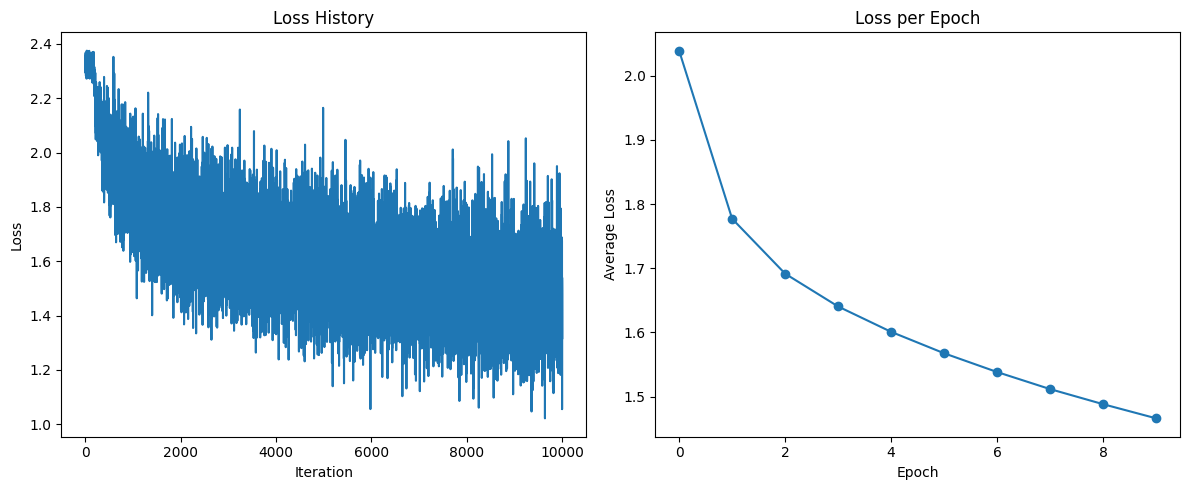

Training accuracy: 50.36%
Test accuracy: 46.59%


In [6]:
# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size
H = 100            # Hidden layer size
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

w1 = torch.randn(Din, H) * std
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std
b2 = torch.zeros(K)

criterion = nn.CrossEntropyLoss()

epochs = 10
lr = 0.1
lr_decay = 0.9
reg = 1e-5

loss_history = []
epoch_loss_history = []

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass with hidden layer and sigmoid activation
        h1 = torch.sigmoid(x_train.mm(w1) + b1)
        y_pred = h1.mm(w2) + b2

        # Calculate loss with regularization
        loss = criterion(y_pred, labels) + reg * (torch.sum(w1**2) + torch.sum(w2**2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        y_pred_exp = torch.exp(y_pred - torch.max(y_pred, 1, keepdim=True)[0])
        softmax_output = y_pred_exp / y_pred_exp.sum(dim=1, keepdim=True)
        softmax_output[range(Ntr), labels] -= 1
        softmax_output /= Ntr

        grad_w2 = h1.t().mm(softmax_output) + reg * w2
        grad_b2 = softmax_output.sum(dim=0)

        dh1 = softmax_output.mm(w2.t())
        dh1 = dh1 * h1 * (1 - h1)  # Sigmoid derivative

        grad_w1 = x_train.t().mm(dh1) + reg * w1
        grad_b1 = dh1.sum(dim=0)

        w1 -= lr * grad_w1
        b1 -= lr * grad_b1
        w2 -= lr * grad_w2
        b2 -= lr * grad_b2

    epoch_loss = running_loss / len(trainloader)
    epoch_loss_history.append(epoch_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}')

    lr *= lr_decay

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(epoch_loss_history, marker='o')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")

plt.tight_layout()
plt.show()

correct_train = 0
total_train = 0
with torch.no_grad():
    for inputs, labels in trainloader:
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        h1 = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = h1.mm(w2) + b2
        _, predicted_train = torch.max(y_train_pred, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        h1 = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = h1.mm(w2) + b2
        _, predicted_test = torch.max(y_test_pred, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

# Question 02

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F

device = ("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
          transforms.Resize((32, 32)),
          transforms.ToTensor()
          ])

train_set = datasets.MNIST("./datasets/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST("./datasets/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

train_data_size = len(train_set)
test_data_size = len(test_set)

In [41]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(images.shape) # Size of the image
print(labels.shape) # Size of the labels

torch.Size([50, 3, 32, 32])
torch.Size([50])


In [42]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.convolutional_layer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )

    def forward(self, x):
        x = self.convolutional_layer(x)
        x = torch.flatten(x, 1)
        x = self.linear_layer(x)
        return x

In [43]:
model = LeNet5().to(device)
print(model)

LeNet5(
  (convolutional_layer): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (linear_layer): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [44]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [47]:
# Training Loop
epochs = 10
train_loss, val_loss = [], []
train_acc, val_acc = [], []

for epoch in range(epochs):
    total_train_loss = 0
    total_val_loss = 0
    correct_train = 0
    correct_val = 0

    model.train()
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        pred = model(image)
        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(pred, 1)
        correct_train += (predicted == label).sum().item()

    total_train_loss /= len(trainloader)
    train_loss.append(total_train_loss)
    train_accuracy = correct_train / train_data_size
    train_acc.append(train_accuracy)

    model.eval()
    with torch.no_grad():
        for image, label in testloader:
            image, label = image.to(device), label.to(device)
            pred = model(image)
            loss = criterion(pred, label)
            total_val_loss += loss.item()

            _, predicted = torch.max(pred, 1)
            correct_val += (predicted == label).sum().item()

    total_val_loss /= len(testloader)
    val_loss.append(total_val_loss)
    val_accuracy = correct_val / test_data_size
    val_acc.append(val_accuracy)

    print(f'Epoch: {epoch + 1}/{epochs}, Train Loss: {total_train_loss:.4f}, Val Loss: {total_val_loss:.4f}, '
          f'Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

Epoch: 1/10, Train Loss: 0.2816, Val Loss: 0.1020, Train Acc: 0.9168, Val Acc: 0.9679
Epoch: 2/10, Train Loss: 0.0886, Val Loss: 0.0737, Train Acc: 0.9725, Val Acc: 0.9765
Epoch: 3/10, Train Loss: 0.0606, Val Loss: 0.0524, Train Acc: 0.9811, Val Acc: 0.9811
Epoch: 4/10, Train Loss: 0.0449, Val Loss: 0.0520, Train Acc: 0.9860, Val Acc: 0.9846
Epoch: 5/10, Train Loss: 0.0373, Val Loss: 0.0453, Train Acc: 0.9879, Val Acc: 0.9858
Epoch: 6/10, Train Loss: 0.0313, Val Loss: 0.0428, Train Acc: 0.9902, Val Acc: 0.9868
Epoch: 7/10, Train Loss: 0.0265, Val Loss: 0.0455, Train Acc: 0.9915, Val Acc: 0.9857
Epoch: 8/10, Train Loss: 0.0228, Val Loss: 0.0461, Train Acc: 0.9925, Val Acc: 0.9862
Epoch: 9/10, Train Loss: 0.0184, Val Loss: 0.0468, Train Acc: 0.9938, Val Acc: 0.9858
Epoch: 10/10, Train Loss: 0.0162, Val Loss: 0.0430, Train Acc: 0.9948, Val Acc: 0.9873


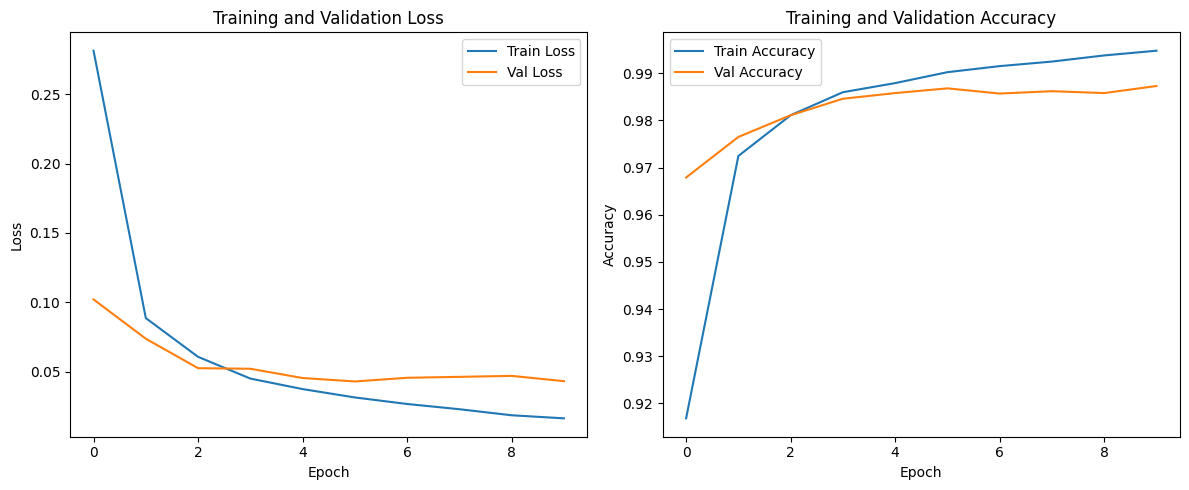

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Question 3

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
!unzip /content/drive/MyDrive/dataset/hymenoptera_data.zip -d /content/hymenoptera_data


Archive:  /content/drive/MyDrive/dataset/hymenoptera_data.zip
   creating: /content/hymenoptera_data/hymenoptera_data/
   creating: /content/hymenoptera_data/hymenoptera_data/train/
   creating: /content/hymenoptera_data/hymenoptera_data/train/ants/
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/0013035.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: /content/hymenoptera_data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inf

In [17]:
import shutil

# Move the actual dataset content (train and val) to the correct folder
shutil.move('/content/hymenoptera_data/hymenoptera_data/train', '/content/hymenoptera_data/train')
shutil.move('/content/hymenoptera_data/hymenoptera_data/val', '/content/hymenoptera_data/val')

# Remove the now-empty nested folder
shutil.rmtree('/content/hymenoptera_data/hymenoptera_data')


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

# Define transformations for training and validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(root=os.path.join(data_dir, x), transform=data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Load Pre-trained ResNet-18

In [24]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    model.load_state_dict(best_model_wts)
    return model

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


Fine-Tuning

In [25]:
model_ft = models.resnet18(pretrained=True)

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
scheduler_ft = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, scheduler_ft, num_epochs=10)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


Epoch 1/10
----------
train Loss: 0.6375 Acc: 0.7090
val Loss: 0.1972 Acc: 0.9346

Epoch 2/10
----------
train Loss: 0.4884 Acc: 0.8279
val Loss: 0.2479 Acc: 0.8889

Epoch 3/10
----------
train Loss: 0.7879 Acc: 0.7459
val Loss: 0.3213 Acc: 0.8954

Epoch 4/10
----------
train Loss: 0.5004 Acc: 0.8361
val Loss: 0.4061 Acc: 0.8693

Epoch 5/10
----------
train Loss: 0.7126 Acc: 0.7623
val Loss: 0.2886 Acc: 0.9085

Epoch 6/10
----------
train Loss: 0.4020 Acc: 0.8566
val Loss: 0.2690 Acc: 0.9020

Epoch 7/10
----------
train Loss: 0.4712 Acc: 0.8361
val Loss: 0.3918 Acc: 0.8497

Epoch 8/10
----------
train Loss: 0.5162 Acc: 0.8238
val Loss: 0.3394 Acc: 0.8889

Epoch 9/10
----------
train Loss: 0.4109 Acc: 0.8033
val Loss: 0.3145 Acc: 0.8758

Epoch 10/10
----------
train Loss: 0.4871 Acc: 0.7910
val Loss: 0.2965 Acc: 0.9150



Using ResNet-18 as a Feature Extractor

In [26]:
model_conv = models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
scheduler_conv = optim.lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv, scheduler_conv, num_epochs=10)


Epoch 1/10
----------
train Loss: 0.7335 Acc: 0.6598
val Loss: 0.1921 Acc: 0.9477

Epoch 2/10
----------
train Loss: 0.4387 Acc: 0.7705
val Loss: 0.2959 Acc: 0.8889

Epoch 3/10
----------
train Loss: 0.5042 Acc: 0.7500
val Loss: 0.1826 Acc: 0.9477

Epoch 4/10
----------
train Loss: 0.5069 Acc: 0.7828
val Loss: 0.5092 Acc: 0.7908

Epoch 5/10
----------
train Loss: 0.5567 Acc: 0.7336
val Loss: 0.1760 Acc: 0.9412

Epoch 6/10
----------
train Loss: 0.3890 Acc: 0.8566
val Loss: 0.1981 Acc: 0.9542

Epoch 7/10
----------
train Loss: 0.5053 Acc: 0.7992
val Loss: 0.1963 Acc: 0.9346

Epoch 8/10
----------
train Loss: 0.3812 Acc: 0.8566
val Loss: 0.2146 Acc: 0.9346

Epoch 9/10
----------
train Loss: 0.4462 Acc: 0.8074
val Loss: 0.1755 Acc: 0.9477

Epoch 10/10
----------
train Loss: 0.4637 Acc: 0.7992
val Loss: 0.3723 Acc: 0.8954



Fine-tuned Model Predictions:


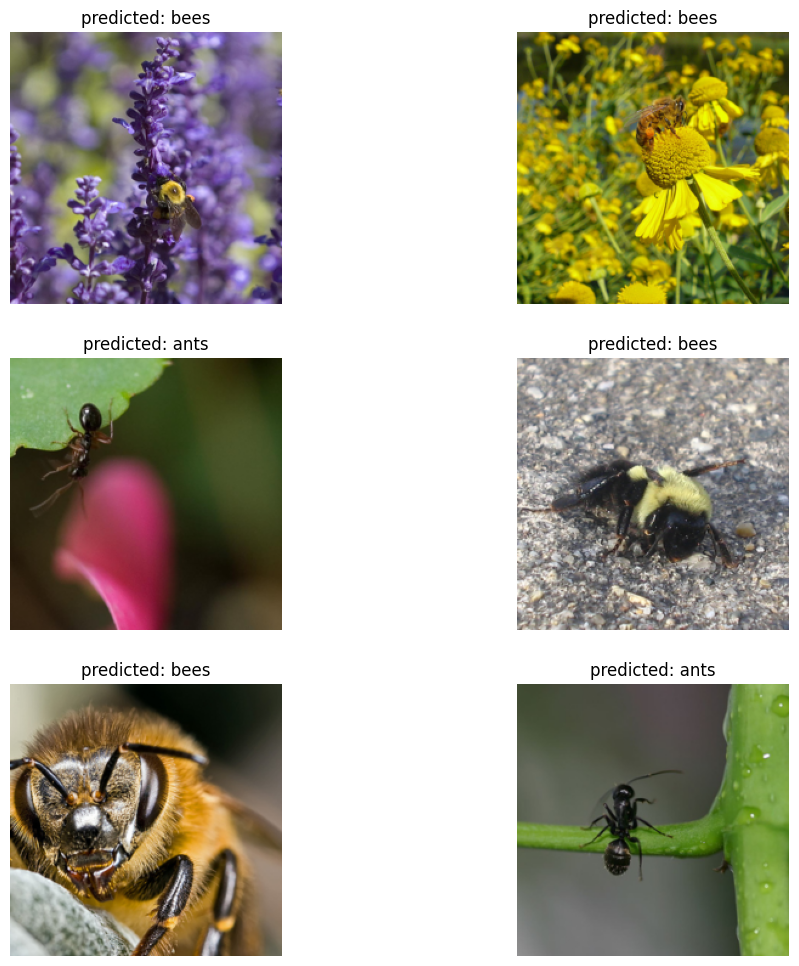

Feature Extractor Model Predictions:


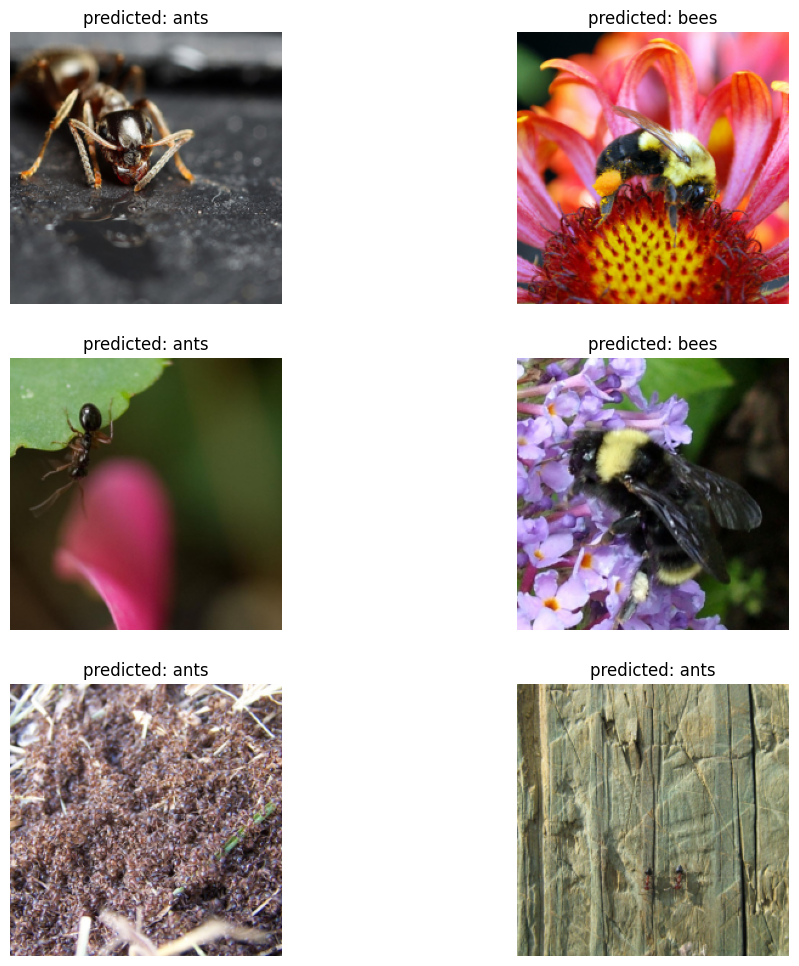

In [33]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

def imshow(tensor, normalize=True):
    if normalize:
        # De-normalize the tensor
        tensor = tensor * torch.tensor([0.229, 0.224, 0.225])[:, None, None] + torch.tensor([0.485, 0.456, 0.406])[:, None, None]

    tensor = tensor.permute(1, 2, 0).numpy()  # Convert from CxHxW to HxWxC
    plt.imshow(tensor)

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(12, 12))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)  # 2 columns
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.show()  # To render the plots
                    return
        model.train(mode=was_training)
        plt.show()  # Ensure plots show after the loop if not reached the limit

print("Fine-tuned Model Predictions:")
visualize_model(model_ft)

print("Feature Extractor Model Predictions:")
visualize_model(model_conv)
